<div align="center">
    

# <font size="7"><font color="blue">LAB 03  -  LINK PREDICTION</font>
    
</div>

---

<div align="center">

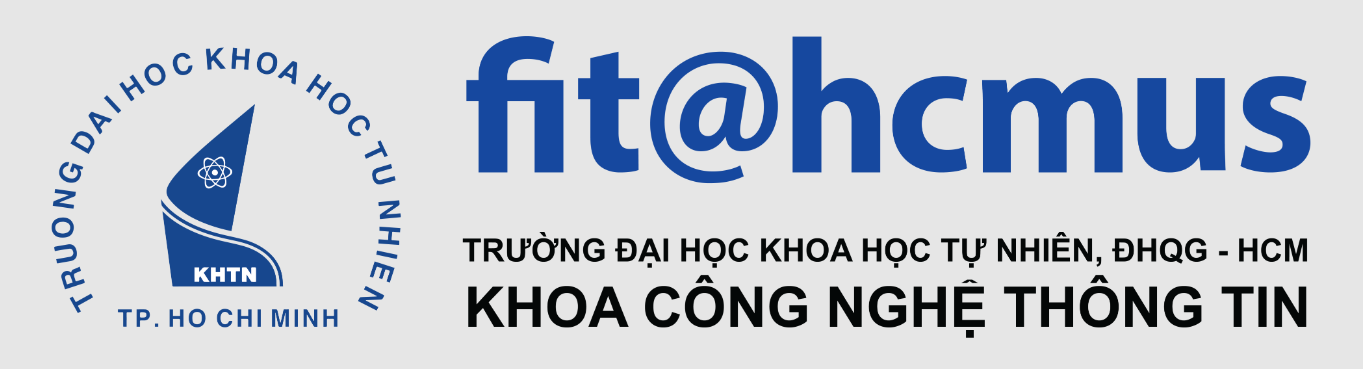

</div>

---

## <font size="6"><font color="blue">I. Student Information and Self-evaluation</font>

<font color="red">This first part includes my general information and also my self-evaluation.</font>

---

<div align="center">

| Student ID | Fullname      | Responsibility                                                        | Evaluation rate (%) |
|------------|---------------|-----------------------------------------------------------------------|---------------------|
| 20127028   | Võ Văn Hoàng  | Report on the knowledge related to link prediction (20%)              | 100%                |
|            |               | Explain the role and meaning of the code (30%)                        | 100%                |
|            |               | Run the experiment on the provided dataset and comment on the results (20%)  | 100%         |
|            |               | Full and detailed report of the implementation process, source code...(30%)| 100%           |
    
</div>

---

- In general, I have done this Lab 03 on time, although there are some difficulties when learning something new,furthermore, I run code author's in local host so it took me a large amount of time. But I tried my best and finished all the tasks as completed as I can. 
- I reckon that I can reach the objective of the lab of link prediction problem.
- Expected grade: 10.00

---

## <font size="6"><font color="blue">II. Work presentation</font>  
    
<font color="red">This part contains the most important work of me in Lab 03 which consists of manual work and code work.</font>

---

## <font size="5"><font color="blue">1. Part 1: Preparing for Main work</font>

<font color="red">Before using the dataset in csv file that downloaded in zip file from Kaggle page, we need to have some important steps to acccess the csv file for our purposes by enrolling Kaggle account. I downloaded all the csv file acccessible and check some information in general. </font>

---

### <font color="blue">1.1. Introduce something the dataset</font>

- After downloading the dataset from Kaggle, I had **FacebookRecruiting.zip** file, I upziped this file manually. Afterthat, I created a folder named **data** includes all the file after upzip. I also created a file named **fea_sample** for future purpose. 
- It is a very large dataset, I used to use Google Colab for this work in order to take advantages from Google GPU to save time, but it was still out of memories. Therefore, I decided to run author's code in my local and it took me many hours.

---

### <font color="blue">1.2. Import some necessary libraries</font>
- Here is the necessary libraries we need to use in Lab 03 at first:

In [4]:
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb
import pandas as pd
import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm

- Now I am going to present the knowledge related to link prediction in the Lab 03 paper in detail following the Lab 03 requirements in Part 2
---

## <font size="5"><font color="blue">2. Part 2: Knowledge related to link prediction</font>

<font color="red">Report on the knowledge related to link prediction in the above paper such as: similarity measures, how to train the model to make predictions, describe the algorithm(s), evaluation metrics.</font>

---

### <font color="blue">2.1. Similarity measures</font>

- Similarity measures are methods for evaluating the likelihood or strength of a link between two graph nodes. Graphs consist of nodes, which represent the connections between the nodes, and edges.
- In this researching paper, the author showed us 2 methods of Similarity measures: Jaccard Distance and Cosine distance. 

### <font color="purple">a. Jaccard Distance</font>

#### <font color="red">Overview of Jaccard Distance</font>

- It evaluates how closely two sets of nodes differ from one another. The Jaccard Distance assesses the degree of similarity between two nodes's groups of neighbors in the context of link prediction. It is calculated by dividing the area of the neighbor's intersection by the area of the neighbor's union. **(Follow the definition of the author because it can be the Jaccard Similarity in orther sources)**

- Now I will show 3 major steps to make up the Jaccard Distance value:

**Step 1:** Count the number of members which are shared between both sets.

**Step 2:** Count the total number of members in both sets (shared and un-shared).

**Step 3:** Divide the number of shared members (in step 1) by the total number of members (in step 2).

- We can display the formula of this measure: 

<div align="center">  

$Jaccard Distance Value = \frac{|X \cap Y|}{|X \cup Y|}$    

</div> 

- This value can be fluctuated from 0 to 1 (0% to 100%)
- The higher Jaccard Distance Value, the more same nodes among each set.

#### <font color="red">Example of Jaccard Distance</font>
- Given **X = {0,1,2,5,6}** and **Y = {0,2,3,4,5,7,9}**. In order to know the similarity of these two sets using Jaccard Distance, we have:


<div align="center">  

$
Jaccard Distance Value = \frac{|X \cap Y|}{|X \cup Y|} = \frac{|(0, 2, 5)|}{|0,1,2,3,4,5,6,7,9|} = \frac{3}{9}
$    

</div> 

#### <font color="red">Advantages</font>

- It is useful for categorical or binary data and treats elements as either present or absent, making it scale-invariant and efficient for sparse data. 

#### <font color="red">Disadvantages</font>

- Jaccard Distance may be sensitive to set size, lacks negative scores, and is not suitable for continuous or numerical data. 

### <font color="purple">b. Cosine distance</font>

#### <font color="red">Overview of Cosine Distance</font>

- Maybe the author had some confusion between the display in formula and applied in code, The author display the markdown that:

<div align="center">  

$Cosine-Distance-Value = \frac{|X \cap Y|}{|X|\times|Y|}$  

</div> 

- But in the code, he implemented like that:

<div align="center"> 

$Cosine-Distance-Value = \frac{|X\cap Y|}{\sqrt{|X|\times|Y|}}$ 

</div> 

- Furthermore, following the [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity), we can realize that the available formula of author is Otsuka–Ochiai Co-efficient (not Cosine Distance).
- To sum up, we will apply the second formula because it was implemented in his code and change a little in the name from Cosine Distance to Otsuka–Ochiai Co-efficient. And after all: 

<div align="center"> 

$Otsuka–Ochiai-Coefficient = \frac{|X\cap Y|}{\sqrt{|X|\times|Y|}}$  (A and B are sets, and |A|, |B| are the number of elements in A and B respectively)

</div> 

- It is a metric for similarity that is calculated as the geometric mean of the sizes of the two sets divided by the size of the intersection of the two sets. 
- The coefficient means that greater values indicate that the two sets are more comparable.

#### <font color="red">Example of Cosine Distance</font>

- Given **A = {0,1,2,5,6}** and **B = {0,2,3,4,5,7,9}**. In order to know the similarity of these two sets using  Otsuka–Ochiai Coefficient, we have:

$Otsuka–Ochiai-Coefficient = \frac{|0, 2, 5|}{\sqrt{|0,1,2,5,6|\times|0,2,3,4,5,7,9|}} = \frac{3}{\sqrt{5\times7}} = \frac{3}{\sqrt{35}}$

#### <font color="red">Advantages</font>
- It is simple and intuitive measure of similarity, especially for binary data and when focusing on the overlapping elements between sets. 

#### <font color="red">Disadvantages</font>
- It has restrictions for handling unbalanced set sizes, non-binary data, and circumstances when non-overlapping pieces are important to the analysis. 

---

### <font color="blue">2.2. How to train the model to make predictions</font>

- <font color="blue">The author with a link prediction method in this competition used link prediction on a social network graph as a classification issue when it came to the training phase of the model for link prediction challenge. The categorization problem can be streamlined by assigning a label of 1 to connections that are actually now in existence and a label of 0 to those that were manufactured artificially. I will show the idea of author step by step bellow:</font>

- **Step 1**, the author conducts data preprocessing by reading the **train.csv** file to check for any value not a number data or duplicated rows. After ensuring there are no abnormal issues during this check, the entire dataset is then read using the NetworkX library in the form of a directed graph.

- **In step 2**, the author used a negative sampling technique by giving the original network's connections a starting value of 1. Then, taking into account that the initial network has a maximum node of 1,862,220, two random variables: a and b were created with values ranging from 1 to 1,862,220. If the length of the shortest path between the two unique variables a and b were greater than 2, the author deemed it to be a phony connection and labeled it as -1 to distinguish it from legitimate linkages.

- **Moving to step 3**, the author divides the training and testing sets for the two files created in step 2 before going on. The author examines the training set to look at a variety of information, including the number of people who were present in both the training and testing sets and the number of people who were not in the training set but were in the testing set. The author recognizes the presence of a cold start issue throughout this analysis and suggests a remedy to deal with it. In order to integrate the real link training data from file 1 with the fake link training data from file 2, the author reads both the training and testing sections from both files. The testing data from both files are combined in a similar manner.

- The author continues reading the combined training and testing files from step 3 in **step 4**. The author, however, merely reads a small portion of rows from the file at random points and skips the other rows in order to avoid exceeding memory restrictions while reading a huge file into a dataframe.

- **In step 5**, the author reads and collects the two dataframes from step 4 and then adds a number of characteristics to the prediction model. These features include labeling to show whether the source and target nodes are members of the same connected community, whether the target node follows the source node, similarity metrics like Jaccard and Cosine similarity, the total number of followers and followees for an individual, the total number of common followers and followees between the source and target nodes of the corresponding link, the Adamic/Adar index, and the shortest path between the source and target nodes.

- **In step 6**, the author's next step will mostly be an evaluation. The source node, destination node, and the projected label column of the links are the three columns that the author removes after the dataframe has enough feature columns for the prediction model. Then, for prediction and assessment, the RandomForestClassifier model is applied. In order to determine the best outcomes on the train and test sets at a model depth of 20, the assessment is based on the F1 score. The author uses RandomizedSearchCV() to find the optimum hyperparameters in order to investigate whether the model may produce better results with various hyperparameters. The final outcomes are consistent with the original strategy when computed using the F1 score for both the train and test sets. As a result, this shows the model's best result to yet.

- **Finally**, the author then feeds into two new graphs the training and testing data with only real linkages. The total number of followers for source and target nodes in these new graphs must then be recalculated. The previously constructed train and test dataframes are then updated with the new columns holding this data. The author also adds additional characteristics to these dataframes which are based on the sum of the follower-to-follower counts for both source and destination nodes. The SVD also contains the result of the product of the components **u**, **s**, and **v**. The author shifts to utilizing the XGBoost model with **RandomizedSearchCV()** to find the ideal hyperparameters after adding these additional characteristics to the dataframe as previously explained. Based on the F1 score, the best outcomes on the train and test sets are obtained.

---

### <font color="blue">2.3. Describe the algorithm(s)</font>

- <font color="blue">The author also introduced some algorithms that can apply in his work, now I will present some algorithms that the author mentioned:</font>

### <font color="purple">a. Page Ranking</font>

- Page Ranking algorithm with the aim of "measuring" each element's relative value within the collection of hyperlinked documents, such as the World Wide Web, PageRank, a link analysis method, gives each element a numerical weighting. Any collection of entities having reciprocal quotes and references can use the method. The PageRank of E, represented by PR(E), is the numerical weight that it gives to each given element E.

[Illustrative image about Page Rank Algorithm](https://en.wikipedia.org/wiki/PageRank#/media/File:PageRanks-Example.svg)
<div align="center">

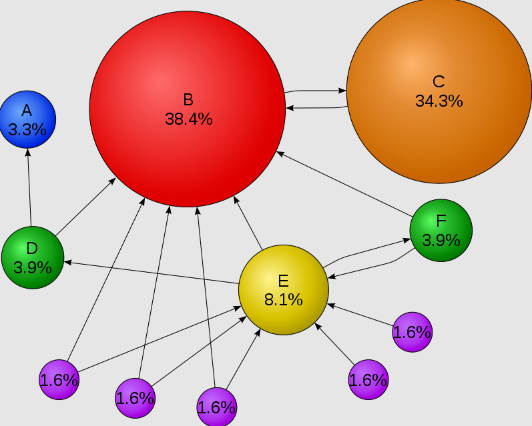

</div>

- I got an example in this Youtube link: [PageRank Algorithm - Example](https://www.youtube.com/watch?v=P8Kt6Abq_rM). This is a directed graph, now I will display the PageRank algorithm:

<div align="center">

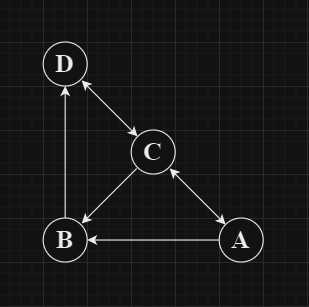

</div>

- With the Iterative, at t=0, an initial probability distribution is assumed, usually: $PR(p_i; 0) = \frac{1}{N}$
    
- N is the total number of pages, and $(p_i; 0)$ is page i at time 0.

- At each time step, the computation will be: $PR(p_i;t+1) = \frac{1-d}{N} + d \sum_{p_j \in M(p_i)} \frac{PR (p_j; t)}{L(p_j)}$
and d is  the damping factor.
- In this example, follow the formula above:
    + With t = 0, $PR(A; 0)= PR(B; 0)= PR(C; 0)= PR(D; 0) = \frac{1}{N} = \frac{1}{4}$
    + With t = 1, $PR(A; 1) = \frac{1/4}{3} = \frac{1}{12}$
    + With t = 1, $PR(B; 1) = \frac{1/4}{2} + \frac{1/4}{3} = \frac{2.5}{12}$
    + With t = 1, $PR(C; 1) = \frac{1/4}{2} + \frac{1/4}{1} = \frac{4.5}{12}$
    + With t = 1, $PR(D; 1) = \frac{1/4}{3} + \frac{1/4}{1}= \frac{4}{12}$

- Follow this way, the result is displayed completely in this table:

<div align="center">

|    | Iteration 0   | Iteration 1           | Iteration 2         |PageRank |
|----|---------------|-----------------------|---------------------|---------|
| A  | 1/4           | 1/12                  | 1.5/12              |1        |
| B  |1/4            | 2.5/12                | 2/12                |2        |
| C  |  1/4          | 4.5/12                | 4.5/12              |4        |
| D  | 1/4           | 4/12                  | 4/12                |3        |
    
</div>

- In conclusion, we had found out the PageRank of this directed graph.

### <font color="purple">b. Adamic/Adar Index</font>

- According to the number of shared links between two nodes, Lada Adamic and Eytan Adar developed the Adamic-Adar index in 2003 to anticipate linkages in a social network. It is described as the total of the two nodes' common neighbors' inverse logarithmic degree centralities with the formula:

<div align="center">

$A(x,y) = \sum_{u \in N(x) \cap N(y)} \frac{1}{\log(|N(u)|)}$
    
</div>    

- The definition is based on the idea that items that are shared by many nodes but have a small number of neighbors are less important for predicting a link between two nodes.

### <font color="purple">c. Katz Centrality</font>

- Katz centrality computes the centrality for a node based on the centrality of its neighbors. It is a generalization of the eigenvector centrality. The Katz centrality for node i is $x_i = \alpha \sum_j A_{ij} x_j + \beta$

- With A is the adjacency matrix of the graph G with eigenvalues ${\lambda}$ and the parameter ${\beta}$ controls the initial centrality, specially: $\alpha < \frac{1}{\lambda_{max}}$

### <font color="purple">d. Hits Algorithm</font>

- The two key phases of this algorithm are updating Hub and Authority. Hub determines a node's value based on outgoing links, whereas Authority determines a node's value based on incoming links.

### <font color="purple">e. Feature for edge weights</font>

- The author presents the formula: $W = \frac{1}{\sqrt{1+|X|}}$, where X is a collection of nodes that are X's **predecessors** or **successors**. The author adds additional features that mix the incoming and outgoing edge weights after computing this feature for each node in the graph, such as:

    + weight of incoming edges + weight of outgoing edges
    + weight of incoming edges * weight of outgoing edges
    + 2*weight of incoming edges + weight of outgoing edges
    + weight of incoming edges + 2*weight of outgoing edges

---

### <font color="blue">2.4. Evaluation metrics</font>

- For the Evaluation metrics, the author used 4 value for the evaluation, those are: F1-score, Recall, Precision and AUC - ROC.

### <font color="purple">a. F1-score</font>

- F1-score an evaluation of a model's accuracy takes into account both the precision and recall of the model. The proportion of positive instances that are actually anticipated to be positive is known as precision, whereas the proportion of positive instances that are actually projected to be positive is known as recall. F1-score is calculated as the harmonic mean of recall and accuracy: $F1 = \frac{2 \cdot (\text{precision} \cdot \text{recall})}{\text{precision} + \text{recall}}$

- About the definition of recall and precision wil be presented bellow, F1-score can range from 0 to 1, where 1 is the best possible score. A high F1 score indicates that the model is both precise and recallful.

### <font color="purple">b. Recall</font>

- Recall is a measure of how many positive instances were correctly identified by a model. It is calculated as the number of true positives divided by the total number of positive instances with the formula: $\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$

   + **true_positives**: The number of instances that were correctly classified as positive.
   + **false_negatives**: The number of instances that were incorrectly classified as negative.

- Recall can range from 0 to 1, where 1 is the best possible score. A high recall indicates that the model is good at identifying positive instances.

### <font color="purple">c. Precision</font>

- Precision is a measure of how many instances that were classified as positive were actually positive. It is calculated as the number of true positives divided by the total number of instances that were classified as positive with the formula: $\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$
    + **true_positives**: The number of instances that were correctly classified as positive.
    + **false_positives**: The number of instances that were incorrectly classified as positive.

- Precision can range from 0 to 1, where 1 is the best possible score. A high precision indicates that the model is good at avoiding false positives.

### <font color="purple">d. AUC - ROC</font>

- AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. It is one of the most important evaluation metrics for checking any classification model’s performance.

#### <font color="red">ROC</font>

- The ROC curve (Receiver Operating Characteristic curve) is a graph that illustrates the performance of a classification model across all classification thresholds. This curve displays two parameters:

    + True Positive Rate (TPR) with the formula: $\text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$
    + False Positive Rate (FPR) with the formula: $\text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}$
    
- The ROC curve plots the graph of TPR against FPR at various classification thresholds. Reducing the classification threshold will classify more items as positive, hence increasing both false positives and true positives. The figure below illustrates a typical ROC curve.    

[The ratio of True Positives (TP) to False Positives (FP) at various classification thresholds.](https://developers.google.com/static/machine-learning/crash-course/images/ROCCurve.svg?hl=vi)

<div align="center">

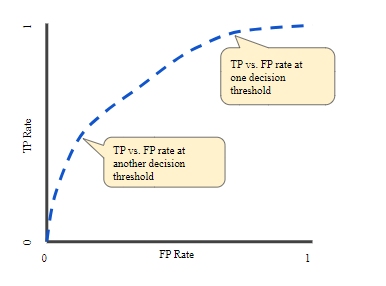
    
</div>    

- To compute points on the ROC curve, we could evaluate the logistic regression model multiple times with various classification thresholds, but this approach would be inefficient. Fortunately, there is an efficient sorting-based algorithm that can provide us with this information, called the AUC (Area Under the Curve).

#### <font color="red">AUC</font>

- AUC stands for "Area under the ROC Curve." This means that AUC measures the entire two-dimensional area beneath the entire ROC curve (assuming integration) from (0,0) to (1,1).

[AUC (Area Under the ROC Curve).](https://developers.google.com/static/machine-learning/crash-course/images/ROCCurve.svg?hl=vi)

<div align="center">

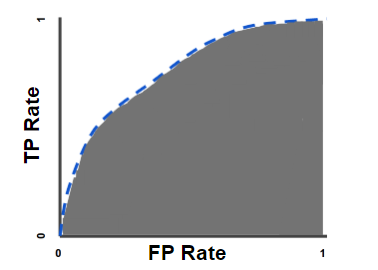

</div>  

- AUC provides a comprehensive measure of performance across all possible classification thresholds. One interpretation of AUC is the probability that the model ranks a randomly chosen positive sample higher than a randomly chosen negative sample.

---

## <font size="5"><font color="blue">3. Part 3: Code Explaination</font>

<font color="red"> In this section, I will divide each code in sequence and explain the role and meaning of the code for the link prediction problem.</font>

---

#### <font color="red">Before using the code of the author, I have something notes:</font>
- All the line of code: **print(nx.info(g))** of the author, I will convert into: **print(f"Number of nodes: {num_nodes}")** and **print(f"Number of edges: {num_edges}")** because this kind of code in NetworkX was upgraded.
- Moreover, I also deleted **min_impurity_split** parameter because it was also upgraded.

---

### <font color="blue">3.1. Exploratory Data Analysis</font>

- The author will now read this dataset in order to look for any irregularities in the data rows. When there are no abnormalities, the data will be stored into a new file called "train_woheader.csv." The author then reads the data from the new file into a directed graph with 1,862,220 nodes and 9,437,519 edges using the NetworkX library.

In [5]:
#reading graph
if not os.path.isfile('data/after_eda/train_woheader.csv'):
    traincsv = pd.read_csv('data/train.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print("Number of duplicate entries: ", sum(traincsv.duplicated()))
    traincsv.to_csv('data/after_eda/train_woheader.csv', header=False, index=False)
    print("Saved the graph into file")
else:
    g = nx.read_edgelist('data/after_eda/train_woheader.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)
    num_nodes = g.number_of_nodes()
    num_edges = g.number_of_edges()

    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")


Number of nodes: 1862220
Number of edges: 9437519


- This bellowing cell show that the author want to read a subset of the data, make a graph visualization and display information about the graph: number of nodes and number of edges.

Number of nodes: 66
Number of edges: 50


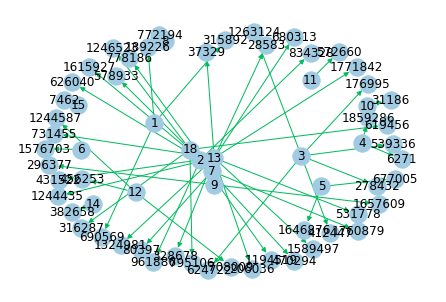

In [6]:
if not os.path.isfile('train_woheader_sample.csv'):
    pd.read_csv('data/train.csv', nrows=50).to_csv('train_woheader_sample.csv', header=False, index=False)

subgraph = nx.read_edgelist('train_woheader_sample.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)

# Drawing the graph
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_color='#A0CBE2', edge_color='#00bb5e', width=1, edge_cmap=plt.cm.Blues, with_labels=True)
plt.savefig("graph_sample.pdf")

# Get graph information
num_nodes = subgraph.number_of_nodes()
num_edges = subgraph.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

- This code will calculates the count of nodes in the graph

In [7]:
# No of Unique persons 
print("The number of unique persons",len(g.nodes()))

The number of unique persons 1862220


### <font color="purple">a. No of followers for each person</font>

- This code creates a figure resembling a histogram to show the distribution of in-degrees (followers) for each node in the graph g. It can help us to know how followers are distributed among different nodes in the graph.

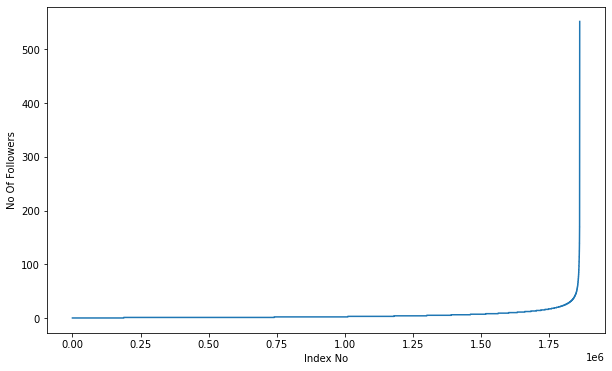

In [8]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

- It helps us know the details on how follower counts are distributed across the chosen nodes in the network by providing the distribution of follower counts for the provided number of nodes.

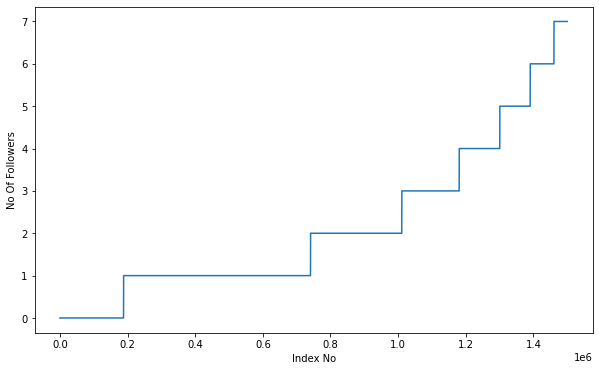

In [9]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

- This code is used for drawing a boxplot, it helps us to identify outliers in the distribution.

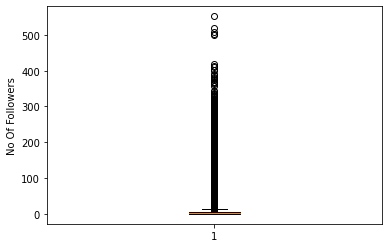

In [10]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of Followers')
plt.show()

- The 90th to 100th percentiles of the distribution of in-degrees (number of followers) for nodes in the graph g are calculated and printed by this code. This loop gives us insight into various portions of the data distribution by displaying how the follower counts are dispersed in the designated percentiles.

In [11]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [12]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


- This code helps us see the distribution of in-degrees of nodes, a probability density function plot is required and revealing information on how the network's nodes follower numbers are dispersed.

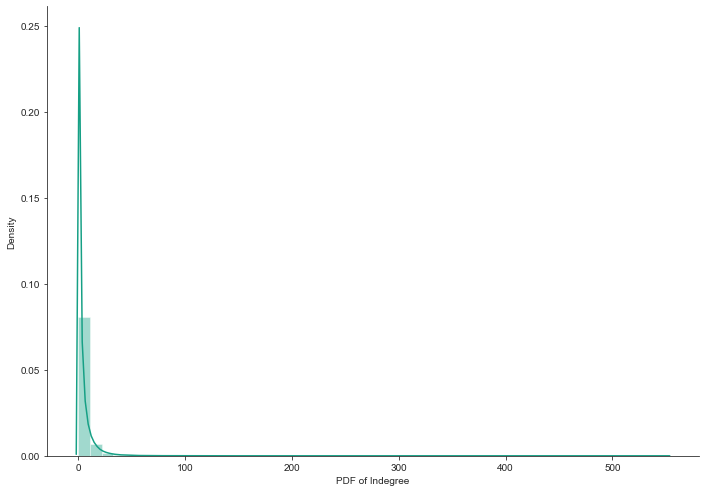

In [13]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

### <font color="purple">b. No of people each person is following</font>

- The meaning of code is similar to section a.

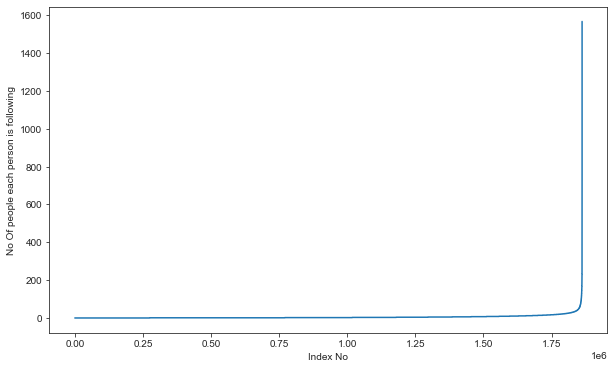

In [14]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

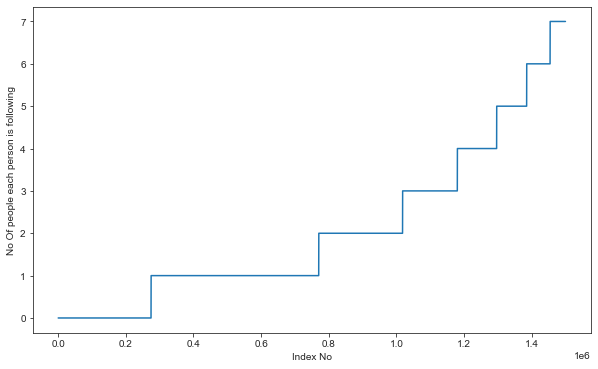

In [15]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

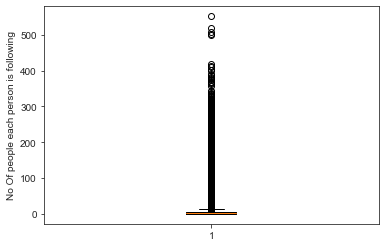

In [16]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of people each person is following')
plt.show()

In [17]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [18]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


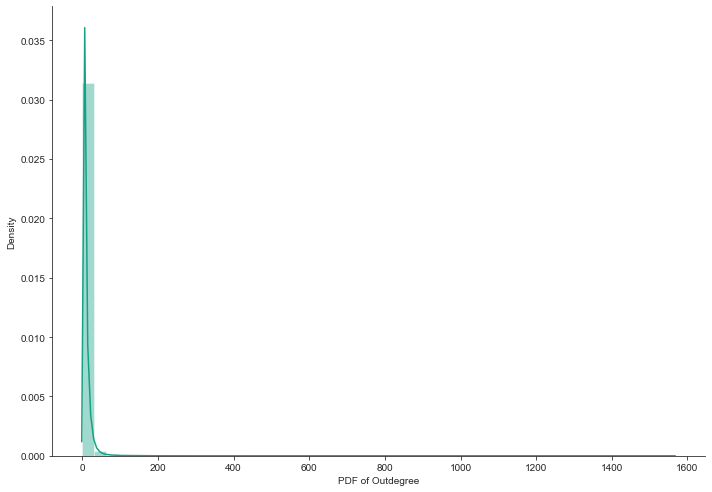

In [19]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

In [20]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )

No of persons those are not following anyone are 274512 and % is 14.741115442858524


In [21]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 188043 and % is 10.097786512871734


In [22]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0 :
        if len(list(g.successors(i)))==0:
            count+=1
print('No of persons those are not not following anyone and also not having any followers are',count)

No of persons those are not not following anyone and also not having any followers are 0


### <font color="purple">c. Both followers + following</font>

In [23]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

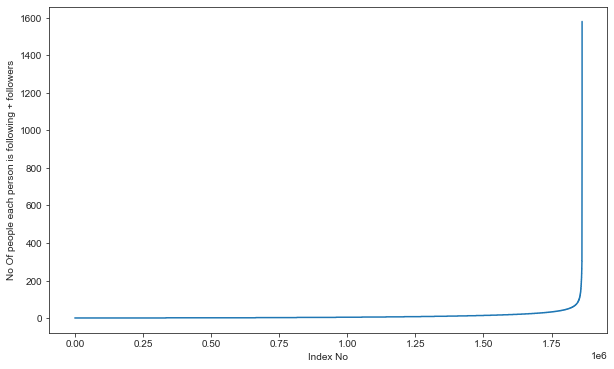

In [24]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

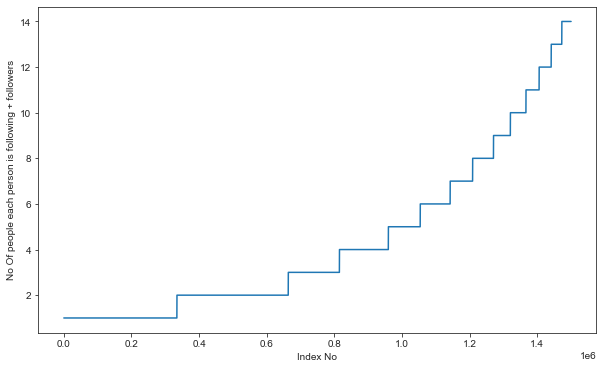

In [25]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [26]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [27]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [28]:
print('Min of no of followers + following is',in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()),' persons having minimum no of followers + following')

Min of no of followers + following is 1
334291  persons having minimum no of followers + following


In [29]:
print('Max of no of followers + following is',in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()),' persons having maximum no of followers + following')

Max of no of followers + following is 1579
1  persons having maximum no of followers + following


In [30]:
print('No of persons having followers + following less than 10 are',np.sum(in_out_degree<10))

No of persons having followers + following less than 10 are 1320326


In [31]:
print('No of weakly connected components',len(list(nx.weakly_connected_components(g))))
count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes',count)

No of weakly connected components 45558
weakly connected components wit 2 nodes 32195


---

### <font color="blue">3.2. Posing a problem as classification problem</font>

### <font color="purple">a. Generating some edges which are not present in graph for supervised learning</font>
<font color="red">Generated Bad links from graph which are not in graph and whose shortest path is greater than 2.</font>

- In this step, the author proceeds to generate fake links that are not present in the graph, with a total number of links equal to the total number of genuine links but having a shortest path greater than 2. This is achieved by randomly creating two nodes. Subsequently, genuine links in the original graph are assigned a label of 1, while the fake links created are assigned a label of -1.
- The author also save these generated fake links in this section.

In [32]:
%%time
###generating bad edges from given graph
import random
if not os.path.isfile('data/after_eda/missing_edges_final.p'):
    #getting all set of edges
    r = csv.reader(open('data/after_eda/train_woheader.csv','r'))
    edges = dict()
    for edge in r:
        edges[(edge[0], edge[1])] = 1
        
        
    missing_edges = set([])
    while (len(missing_edges)<9437519):
        a=random.randint(1, 1862220)
        b=random.randint(1, 1862220)
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
            try:
                if nx.shortest_path_length(g,source=a,target=b) > 2: 

                    missing_edges.add((a,b))
                else:
                    continue  
            except:  
                    missing_edges.add((a,b))              
        else:
            continue
    pickle.dump(missing_edges,open('data/after_eda/missing_edges_final.p','wb'))
else:
    missing_edges = pickle.load(open('data/after_eda/missing_edges_final.p','rb'))

CPU times: total: 2h 46min 8s
Wall time: 5h 30min 35s


In [33]:
len(missing_edges)

9437519

### <font color="purple">b. Training and Test data split</font>
<font color="red">Removed edges from Graph and used as test data and after removing used that graph for creating features for Train and test data</font>

- After successfully creating a file containing a list of fake links with the same number of links as the original genuine links in the above code cell, the author utilizes two dataframes to store the list of genuine links and fake links. Subsequently, for each created dataframe, the author splits the dataset with an 80:20 train-test ratio. 
- All source and destination node values in the dataframe that correspond to real and false connections are included in this division under the headings x_train_pos, x_test_pos, x_train_neg, and x_test_neg. The output values that the model must predict are represented by the variables y_train_pos, y_test_pos, y_train_neg, and y_test_neg, which are labeled as 1 for real link dataframes and 0 otherwise.
- The author then saves the train and test values into four distinct CSV files: 
    + train_pos_after_eda.csv 
    + train_neg_after_eda.csv
    + test_pos_after_eda.csv
    + test_neg_after_eda.csv
- This is done after separating the train and test values for the dataframe including real links and false links.

In [34]:
from sklearn.model_selection import train_test_split
if (not os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and (not os.path.isfile('data/after_eda/test_pos_after_eda.csv')):
    #reading total data df
    df_pos = pd.read_csv('data/train.csv')
    df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    
    print("Number of nodes in the graph with edges", df_pos.shape[0])
    print("Number of nodes in the graph without edges", df_neg.shape[0])
    
    #Trian test split 
    #Spiltted data into 80-20 
    #positive links and negative links seperatly because we need positive training data only for creating graph 
    #and for feature generation
    X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
    
    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])

    #removing header and saving
    X_train_pos.to_csv('data/after_eda/train_pos_after_eda.csv',header=False, index=False)
    X_test_pos.to_csv('data/after_eda/test_pos_after_eda.csv',header=False, index=False)
    X_train_neg.to_csv('data/after_eda/train_neg_after_eda.csv',header=False, index=False)
    X_test_neg.to_csv('data/after_eda/test_neg_after_eda.csv',header=False, index=False)
else:
    #Graph from Traing data only 
    del missing_edges

Number of nodes in the graph with edges 9437519
Number of nodes in the graph without edges 9437519
Number of nodes in the train data graph with edges 7550015 = 7550015
Number of nodes in the train data graph without edges 7550015 = 7550015
Number of nodes in the test data graph with edges 1887504 = 1887504
Number of nodes in the test data graph without edges 1887504 = 1887504


- This cell of code can read two files that include real links, train_pos_after_eda.csv and test_pos_after_eda.csv, into two directed graphs. Nodes are then removed from the train and test graphs that do not overlap. The number of nodes that occur in both the train and test graphs is then shown, along with the numbers of nodes that appear in the train set but not the test set and the number of nodes that appear in the test set but not the train set, % of people not there in Train but exist in Test in total Test data.

In [39]:
if (os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and (os.path.isfile('data/after_eda/test_pos_after_eda.csv')):
    train_graph = nx.read_edgelist('data/after_eda/train_pos_after_eda.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)
    test_graph = nx.read_edgelist('data/after_eda/test_pos_after_eda.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)
    
    print('Number of nodes and edges in the train graph:')
    print(train_graph.number_of_nodes())
    print(train_graph.number_of_edges())
    
    print('Number of nodes and edges in the test graph:')
    print(test_graph.number_of_nodes())
    print(test_graph.number_of_edges())
    
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())
    
    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)
    
    print('Number of people common in train and test:', trY_teY)
    print('Number of people present in train but not present in test:', trY_teN)
    print('Number of people present in test but not present in train:', teY_trN)
    print('% of people not there in Train but exist in Test in total Test data:', teY_trN / len(test_nodes_pos) * 100)

Number of nodes and edges in the train graph:
1780722
7550015
Number of nodes and edges in the test graph:
1144623
1887504
Number of people common in train and test: 1063125
Number of people present in train but not present in test: 717597
Number of people present in test but not present in train: 81498
% of people not there in Train but exist in Test in total Test data: 7.1200735962845405


- This code combines the positive and negative edge data and labels for train and test, and creates the final datasets necessary for training and evaluating the machine learning model and give us some information about trainning and testing dataset.

In [40]:
#final train and test data sets
if (not os.path.isfile('data/after_eda/train_after_eda.csv')) and \
(not os.path.isfile('data/after_eda/test_after_eda.csv')) and \
(not os.path.isfile('data/train_y.csv')) and \
(not os.path.isfile('data/test_y.csv')) and \
(os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and \
(os.path.isfile('data/after_eda/test_pos_after_eda.csv')) and \
(os.path.isfile('data/after_eda/train_neg_after_eda.csv')) and \
(os.path.isfile('data/after_eda/test_neg_after_eda.csv')):
    
    X_train_pos = pd.read_csv('data/after_eda/train_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv('data/after_eda/test_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv('data/after_eda/train_neg_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv('data/after_eda/test_neg_after_eda.csv', names=['source_node', 'destination_node'])

    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

    X_train = X_train_pos.append(X_train_neg,ignore_index=True)
    y_train = np.concatenate((y_train_pos,y_train_neg))
    X_test = X_test_pos.append(X_test_neg,ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
    X_train.to_csv('data/after_eda/train_after_eda.csv',header=False,index=False)
    X_test.to_csv('data/after_eda/test_after_eda.csv',header=False,index=False)
    pd.DataFrame(y_train.astype(int)).to_csv('data/train_y.csv',header=False,index=False)
    pd.DataFrame(y_test.astype(int)).to_csv('data/test_y.csv',header=False,index=False)

Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


- This cell of code can show us the dimensions of the datasets and the shapes of the labels for both the train and test datasets.

In [41]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100030, 2)
Data points in test data (3775008, 2)
Shape of traget variable in train (15100030,)
Shape of traget variable in test (3775008,)


- This cell of code helps us search for the train_pos_after_eda.csv file in the data/after_eda directory. If so, the program will read the file and display information. In contrast, it displays "please run the FB_EDA.ipynb or download the files from drive"

In [42]:
if os.path.isfile('data/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print('Number of nodes and edges in the train graph:')
    print(train_graph.number_of_nodes())
    print(train_graph.number_of_edges())
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

Number of nodes and edges in the train graph:
1780722
7550015


---

### <font color="blue">3.3. Similarity measures</font>
### <font color="purple">a. Jaccard Distance</font>

- I had introduced Jaccard Distance in Part 2, to be more specific, in these bellowing code cells use similarity measures: Jaccard and cosine for two nodes that are divided into two cases: the set of people in the nodes are following and the set of people that nodes are being followed, after reading the file train_pos_after_eda.csv, which contains the true links in the train set.

In [43]:
#for followees
def jaccard_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim

In [44]:
#one test case
print(jaccard_for_followees(273084,1505602))

0.0


In [45]:
#node 1635354 not in graph 
print(jaccard_for_followees(273084,1505602))

0.0


In [46]:
#for followers
def jaccard_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                 (len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [47]:
print(jaccard_for_followers(273084,470294))

0.0


In [48]:
#node 1635354 not in graph 
print(jaccard_for_followees(669354,1635354))

0


### <font color="purple">b. Cosine distance</font>

In [49]:
#for followees
def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0

In [50]:
print(cosine_for_followees(273084,1505602))

0.0


In [51]:
print(cosine_for_followees(273084,1635354))

0


In [52]:
def cosine_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [53]:
print(cosine_for_followers(2,470294))

0.02886751345948129


In [54]:
print(cosine_for_followers(669354,1635354))

0


---

### <font color="blue">3.4. Ranking Measures (Page Ranking)</font>

- This code verifies the existence of the file data/fea_sample/page_rank.p. The function will determine the PageRank of each node in the graph train_graph and store the PageRank scores to the file if it does not exist. The function will load the PageRank ratings from the file if it is there.

In [55]:
if not os.path.isfile('data/fea_sample/page_rank.p'):
    pr = nx.pagerank(train_graph, alpha=0.85)
    pickle.dump(pr,open('data/fea_sample/page_rank.p','wb'))
else:
    pr = pickle.load(open('data/fea_sample/page_rank.p','rb'))

- This code helps us print the minimum, maximum, and mean of the PageRank scores.

In [56]:
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))

min 1.6556497245737814e-07
max 2.709825134193587e-05
mean 5.615699699389075e-07


- It can impute the PageRank scores of the nodes that aren't in the training data, one must calculate the mean PageRank score.

In [57]:
#for imputing to nodes which are not there in Train data
mean_pr = float(sum(pr.values())) / len(pr)
print(mean_pr)

5.615699699389075e-07


---

### <font color="blue">3.5. Other Graph Features</font>

### <font color="purple">a. Shortest path</font>

- This feature is about the shortest path between two nodes in the graph, excluding direct paths.

In [58]:
#if has direct edge then deleting that edge and calculating shortest path
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

In [59]:
#testing
compute_shortest_path_length(77697, 826021)

10

In [60]:
#testing
compute_shortest_path_length(669354,1635354)

-1

### <font color="purple">b. Checking for same community</font>

- This code helps us determine whether two nodes are members of the same community, use the weakly_connected_components() method. The result is deemed to yield 1, signifying that the two nodes are members of the same linked community, if there is an edge connecting from node b to node an or if there is an edge connecting from node a to b after removing the direct edge, and otherwise returns 0.

In [61]:
#getting weekly connected edges from graph 
wcc=list(nx.weakly_connected_components(train_graph))
def belongs_to_same_wcc(a,b):
    index = []
    if train_graph.has_edge(b,a):
        return 1
    if train_graph.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                train_graph.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    train_graph.add_edge(a,b)
                    return 0
                else:
                    train_graph.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

In [62]:
belongs_to_same_wcc(861, 1659750)

0

In [63]:
belongs_to_same_wcc(669354,1635354)

0

### <font color="purple">c. Adamic/Adar Index</font>

- I had given some information about Adamic/Adar Index in part 2 already, this code is only show the way to calculate again.

In [64]:
#adar index
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

In [65]:
calc_adar_in(1,189226)

0

In [66]:
calc_adar_in(669354,1635354)

0

### <font color="purple">d. Is persion was following back</font>

- This code will return 1 if there is an edge connecting from node b to node a, and 0 otherwise.

In [67]:
def follows_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

In [68]:
follows_back(1,189226)

1

In [69]:
follows_back(669354,1635354)

0

### <font color="purple">e. Katz Centrality</font>

- This is still as same as the theory I had given.

In [70]:
if not os.path.isfile('data/fea_sample/katz.p'):
    katz = nx.katz.katz_centrality(train_graph,alpha=0.005,beta=1)
    pickle.dump(katz,open('data/fea_sample/katz.p','wb'))
else:
    katz = pickle.load(open('data/fea_sample/katz.p','rb'))

In [71]:
print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean',float(sum(katz.values())) / len(katz))

min 0.0007313532484055978
max 0.003394554981694509
mean 0.0007483800935553944


In [72]:
mean_katz = float(sum(katz.values())) / len(katz)
print(mean_katz)

0.0007483800935553944


### <font color="purple">f. Hits Score</font>

- Still the same way to apply as part 2.

In [73]:
if not os.path.isfile('data/fea_sample/hits.p'):
    hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
    pickle.dump(hits,open('data/fea_sample/hits.p','wb'))
else:
    hits = pickle.load(open('data/fea_sample/hits.p','rb'))

In [74]:
print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))

min -5.107494782050822e-20
max 0.004868653379538982
mean 5.615699699308675e-07


---

### <font color="blue">3.6. Featurization</font>

### <font color="purple">a. Reading a sample of Data from both train and test</font>

- This code is used to sample a subset of the data from the files train_after_eda.csv and test_after_eda.csv. The purpose of this is to reduce the size of the data, which can make it easier to work with.
- The skip_train and skip_test variables can be used to specify the rows that will be skipped. The s variable can be used to specify the desired sample size.

In [75]:
import random
if os.path.isfile('data/after_eda/train_after_eda.csv'):
    filename = "data/after_eda/train_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 15100030
    # n_train = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_train =  15100028
    s = 100000 #desired sample size
    skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))
    #https://stackoverflow.com/a/22259008/4084039

In [76]:
if os.path.isfile('data/after_eda/train_after_eda.csv'):
    filename = "data/after_eda/test_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 3775008
    # n_test = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_test = 3775006
    s = 50000 #desired sample size
    skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))
    #https://stackoverflow.com/a/22259008/4084039

- This code help us to know the number of rows in the training and test data files, as well as the number of rows that will be skipped.

In [77]:
print("Number of rows in the train data file:", n_train)
print("Number of rows we are going to elimiate in train data are",len(skip_train))
print("Number of rows in the test data file:", n_test)
print("Number of rows we are going to elimiate in test data are",len(skip_test))

Number of rows in the train data file: 15100028
Number of rows we are going to elimiate in train data are 15000028
Number of rows in the test data file: 3775006
Number of rows we are going to elimiate in test data are 3725006


- The author then reads the two files train_after_eda.csv and test_after_eda.csv into two dataframes, df_final_train and df_final_test, after receiving the list of rows to be skipped when reading the file. By reading from the two files train_y.csv and test_y.csv, the author additionally adds a new column called indicator_link to these two dataframes, where each row is assigned a value of 1 if it is a real link and a value of 0 if it is a false link.

In [78]:
df_final_train = pd.read_csv('data/after_eda/train_after_eda.csv', skiprows=skip_train, names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('data/train_y.csv', skiprows=skip_train, names=['indicator_link'])
print("Our train matrix size ",df_final_train.shape)
df_final_train.head(2)

Our train matrix size  (100002, 3)


,source_node,destination_node,indicator_link
0,273084,1505602,1
1,227087,1736008,1


In [79]:
df_final_test = pd.read_csv('data/after_eda/test_after_eda.csv', skiprows=skip_test, names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('data/test_y.csv', skiprows=skip_test, names=['indicator_link'])
print("Our test matrix size ",df_final_test.shape)
df_final_test.head(2)

Our test matrix size  (50002, 3)


,source_node,destination_node,indicator_link
0,848424,784690,1
1,1810977,1642326,1


### <font color="purple">b. Adding a set of features</font>
<font color="red">This code will create these each of these features for both train and test data points.
- 1. jaccard_followers
    
- 2. jaccard_followees
    
- 3. cosine_followers
    
- 4. cosine_followees
    
- 5. num_followers_s
    
- 6. num_followees_s
    
- 7. num_followers_d
    
- 8. num_followees_d
    
- 9. inter_followers
    
- 10. inter_followees
    
</font>

In [80]:
if not os.path.isfile('data/fea_sample/storage_sample_stage1.h5'):
    #mapping jaccrd followers to train and test data
    df_final_train['jaccard_followers'] = df_final_train.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['jaccard_followers'] = df_final_test.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccrd followees to train and test data
    df_final_train['jaccard_followees'] = df_final_train.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['jaccard_followees'] = df_final_test.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    

        #mapping jaccrd followers to train and test data
    df_final_train['cosine_followers'] = df_final_train.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['cosine_followers'] = df_final_test.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccrd followees to train and test data
    df_final_train['cosine_followees'] = df_final_train.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['cosine_followees'] = df_final_test.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)

- This code can calculate the number of followers, followees, and the intersection of followers and followees for the source and destination nodes in a graph.
- It can return:
    + num_followers_s: The number of followers for the source node.
    + num_followees_s: The number of followees for the source node.
    + num_followers_d: The number of followers for the destination node.
    + num_followees_d: The number of followees for the destination node.
    + inter_followers: The number of followers that the source and destination nodes have in common.
    + inter_followees: The number of followees that the source and destination nodes have in common.

In [81]:
def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees

- This code can store all 10 features to the file storage_sample_stage1.h5 and read the file back into the two new dataframes df_final_train and df_final_test. This is done after adding all 10 features to the two dataframes df_final_train and df_final_test.

In [86]:
if not os.path.isfile('data/fea_sample/storage_sample_stage1.h5'):
    df_final_train['num_followers_s'], df_final_train['num_followers_d'], \
    df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
    df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)
    
    df_final_test['num_followers_s'], df_final_test['num_followers_d'], \
    df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
    df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)
    
    hdf = HDFStore('data/fea_sample/storage_sample_stage1.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('data/fea_sample/storage_sample_stage1.h5', 'train_df',mode='r')
    df_final_test = read_hdf('data/fea_sample/storage_sample_stage1.h5', 'test_df',mode='r')

### <font color="purple">c. Adding new set of features</font>
<font color="red">It will create these each of these features for both train and test data points.
    
- 1. adar index
- 2. is following back
- 3. belongs to same weakly connect components
- 4. shortest path between source and destination
    
</font>

In [87]:
if not os.path.isfile('data/fea_sample/storage_sample_stage2.h5'):
    #mapping adar index on train
    df_final_train['adar_index'] = df_final_train.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
    #mapping adar index on test
    df_final_test['adar_index'] = df_final_test.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping followback or not on train
    df_final_train['follows_back'] = df_final_train.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #mapping followback or not on test
    df_final_test['follows_back'] = df_final_test.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping same component of wcc or not on train
    df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

    ##mapping same component of wcc or not on train
    df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)
    
    #--------------------------------------------------------------------------------------------------------
    #mapping shortest path on train 
    df_final_train['shortest_path'] = df_final_train.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
    #mapping shortest path on test
    df_final_test['shortest_path'] = df_final_test.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)

    hdf = HDFStore('data/fea_sample/storage_sample_stage2.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('data/fea_sample/storage_sample_stage2.h5', 'train_df',mode='r')
    df_final_test = read_hdf('data/fea_sample/storage_sample_stage2.h5', 'test_df',mode='r')

### <font color="purple">d. Adding new set of features</font>
<font color="red">After that, it will create these each of these features for both train and test data points.
    
- 1. Weight Features
    
      + weight of incoming edges
    
      + weight of outgoing edges
    
      + weight of incoming edges + weight of outgoing edges
    
      + weight of incoming edges * weight of outgoing edges
    
      + 2*weight of incoming edges + weight of outgoing edges
    
      + weight of incoming edges + 2*weight of outgoing edges
    
- 2. Page Ranking of source
- 3. Page Ranking of dest
- 4. katz of source
- 5. katz of dest
- 6. hubs of source
- 7. hubs of dest
- 8. authorities_s of source
- 9. authorities_s of dest
    
</font>

#### <font color="red">Weight Features</font>

- This idea is defined in Part 2 already.

In [88]:
#weight for source and destination of each link
Weight_in = {}
Weight_out = {}
for i in  tqdm(train_graph.nodes()):
    s1=set(train_graph.predecessors(i))
    w_in = 1.0/(np.sqrt(1+len(s1)))
    Weight_in[i]=w_in
    
    s2=set(train_graph.successors(i))
    w_out = 1.0/(np.sqrt(1+len(s2)))
    Weight_out[i]=w_out
    
#for imputing with mean
mean_weight_in = np.mean(list(Weight_in.values()))
mean_weight_out = np.mean(list(Weight_out.values()))

100%|██████████| 1780722/1780722 [00:17<00:00, 104406.71it/s]


In [89]:
if not os.path.isfile('data/fea_sample/storage_sample_stage3.h5'):
    #mapping to pandas train
    df_final_train['weight_in'] = df_final_train.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_train['weight_out'] = df_final_train.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))

    #mapping to pandas test
    df_final_test['weight_in'] = df_final_test.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_test['weight_out'] = df_final_test.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))


    #some features engineerings on the in and out weights
    df_final_train['weight_f1'] = df_final_train.weight_in + df_final_train.weight_out
    df_final_train['weight_f2'] = df_final_train.weight_in * df_final_train.weight_out
    df_final_train['weight_f3'] = (2*df_final_train.weight_in + 1*df_final_train.weight_out)
    df_final_train['weight_f4'] = (1*df_final_train.weight_in + 2*df_final_train.weight_out)

    #some features engineerings on the in and out weights
    df_final_test['weight_f1'] = df_final_test.weight_in + df_final_test.weight_out
    df_final_test['weight_f2'] = df_final_test.weight_in * df_final_test.weight_out
    df_final_test['weight_f3'] = (2*df_final_test.weight_in + 1*df_final_test.weight_out)
    df_final_test['weight_f4'] = (1*df_final_test.weight_in + 2*df_final_test.weight_out)

In [90]:
if not os.path.isfile('data/fea_sample/storage_sample_stage3.h5'):
    
    #page rank for source and destination in Train and Test
    #if anything not there in train graph then adding mean page rank 
    df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

    df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))
    #================================================================================

    #Katz centrality score for source and destination in Train and test
    #if anything not there in train graph then adding mean katz score
    df_final_train['katz_s'] = df_final_train.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_train['katz_d'] = df_final_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

    df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))
    #================================================================================

    #Hits algorithm score for source and destination in Train and test
    #if anything not there in train graph then adding 0
    df_final_train['hubs_s'] = df_final_train.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_train['hubs_d'] = df_final_train.destination_node.apply(lambda x: hits[0].get(x,0))

    df_final_test['hubs_s'] = df_final_test.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_test['hubs_d'] = df_final_test.destination_node.apply(lambda x: hits[0].get(x,0))
    #================================================================================

    #Hits algorithm score for source and destination in Train and Test
    #if anything not there in train graph then adding 0
    df_final_train['authorities_s'] = df_final_train.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_train['authorities_d'] = df_final_train.destination_node.apply(lambda x: hits[1].get(x,0))

    df_final_test['authorities_s'] = df_final_test.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_test['authorities_d'] = df_final_test.destination_node.apply(lambda x: hits[1].get(x,0))
    #================================================================================

    hdf = HDFStore('data/fea_sample/storage_sample_stage3.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('data/fea_sample/storage_sample_stage3.h5', 'train_df',mode='r')
    df_final_test = read_hdf('data/fea_sample/storage_sample_stage3.h5', 'test_df',mode='r')

### <font color="purple">e. Adding new set of features</font>
<font color="red">It will create these each of these features for both train and test data points.
    
-  SVD features for both source and destination
    
</font>

- It is necessary to calculate 6 singular values and 6 singular vectors so that author additionally saves the SVD features to the storage_sample_stage4.h4 file after adding them to the dataframe. After reading the file, the author continues to use the two dataframes df_final_train and df_final_test on the new.h5 file.

In [91]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [92]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [93]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [94]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 6)
V Shape (6, 1780722)
s Shape (6,)


In [95]:
if not os.path.isfile('data/fea_sample/storage_sample_stage4.h5'):
    #===================================================================================================
    
    df_final_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_train.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    #===================================================================================================
    
    df_final_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_train.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================
    
    df_final_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_test.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)

    #===================================================================================================
    
    df_final_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_test.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================

    hdf = HDFStore('data/fea_sample/storage_sample_stage4.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()

---

## <font size="5"><font color="blue">4. Part 4: Experimenting on the provided data set </font>

<font color="red">In this part, I will run the experiment on the provided data set, take pictures to demonstrate the results and comment on the results that have been run.</font>

- The indicator_link column, which has a label of 1 if it is a genuine link and 0 if it is a false link, is chosen by the author as the output that the model will be able to predict. The author utilizes the remaining features that were included previously for the learning of the model after removing the source_node, destination_node, and indicator_link columns from the two dataframes, df_final_train and df_final_test.

---

In [96]:
import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

- The code reads the two dataframes df_final_train and df_final_test from the file storage_sample_stage4.h5. The read_hdf() function from the pandas library is used to read the dataframes from the file. The mode parameter is set to r to indicate that the file will be read in read-only mode.

In [111]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [112]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [113]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [114]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

- This code help us train a model with two hyperparameters: estimators and depths. Estimators is the number of trees in the random forest, and depths is the maximum depth of each tree.

Estimators = 10 Train Score 0.9239027013610227 Test Score 0.906053929283391
Estimators = 50 Train Score 0.924683352650649 Test Score 0.905649178590355
Estimators = 100 Train Score 0.9256431413918801 Test Score 0.9125988402741171
Estimators = 250 Train Score 0.9237446400066771 Test Score 0.9128963792632442
Estimators = 450 Train Score 0.9238555373522138 Test Score 0.9130882569308699


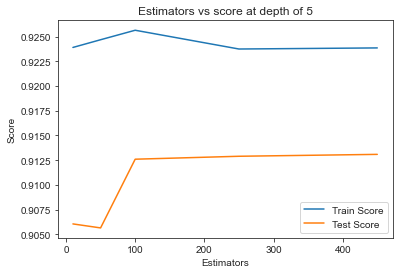

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

estimators = [10,50,100,250,450]
train_scores = []
test_scores = []

for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1, random_state=25, verbose=0, warm_start=False)
    clf.fit(df_final_train, y_train)
    train_sc = f1_score(y_train, clf.predict(df_final_train))
    test_sc = f1_score(y_test, clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators =', i, 'Train Score', train_sc, 'Test Score', test_sc)

plt.plot(estimators, train_scores, label='Train Score')
plt.plot(estimators, test_scores, label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')
plt.legend()
plt.show()

Depth = 3 Train Score 0.8784869067452689 Test Score 0.8569376740947076
Depth = 9 Train Score 0.9557171857307531 Test Score 0.9197516573713564
Depth = 11 Train Score 0.9591571332777924 Test Score 0.9201345102984447
Depth = 15 Train Score 0.9635042422766208 Test Score 0.9219193341600286
Depth = 20 Train Score 0.9635086864750771 Test Score 0.9223007063572151
Depth = 35 Train Score 0.9633734206119653 Test Score 0.9224107124088206
Depth = 50 Train Score 0.9633734206119653 Test Score 0.9224107124088206
Depth = 70 Train Score 0.9633734206119653 Test Score 0.9224107124088206
Depth = 130 Train Score 0.9633734206119653 Test Score 0.9224107124088206


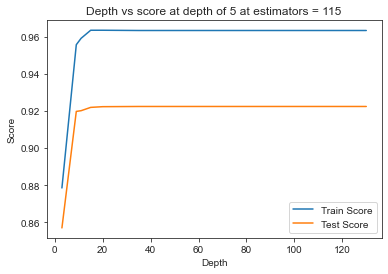

In [121]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []

for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1, random_state=25, verbose=0, warm_start=False)
    clf.fit(df_final_train, y_train)
    train_sc = f1_score(y_train, clf.predict(df_final_train))
    test_sc = f1_score(y_test, clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Depth =', i, 'Train Score', train_sc, 'Test Score', test_sc)

plt.plot(depths, train_scores, label='Train Score')
plt.plot(depths, test_scores, label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.legend()
plt.show()

- After knowing the results of 2 methods, we can confirm that method of hyperparameter depths is better.

- The best sets of hyperparameters are found using the RandomizedSearchCV() method in this code, and the final F-score for both the training and testing sets is largely unaltered from prior findings.

In [123]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25, return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96184417 0.96136533 0.95963469 0.96108637 0.96313032]
mean train scores [0.96288445 0.962279   0.9600293  0.96196843 0.96451795]


In [124]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [126]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                             max_depth=14, max_features='auto', max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_samples_leaf=28, min_samples_split=111,
                             min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
                             oob_score=False, random_state=25, verbose=0, warm_start=False)

In [127]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [128]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9655634109973931
Test f1 score 0.9238629912319435


- This code helps us know more about the matrics confusion.

In [129]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


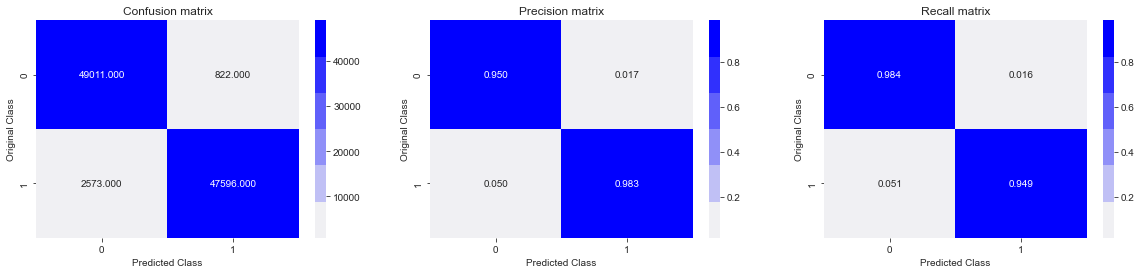

Test confusion_matrix


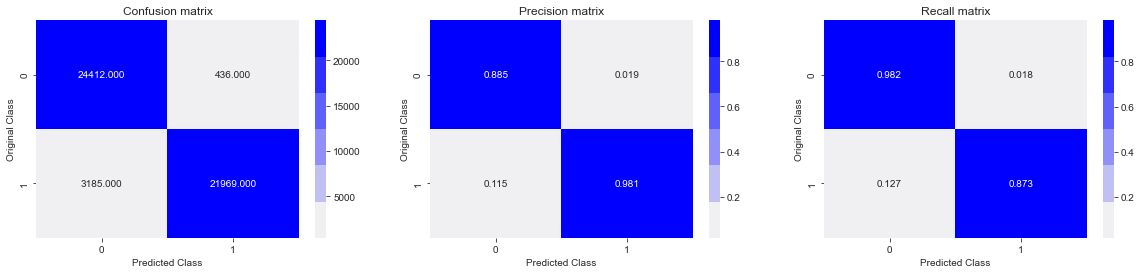

In [130]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

- It displays the AUC-ROC that we had mentioned clearly in part 2.

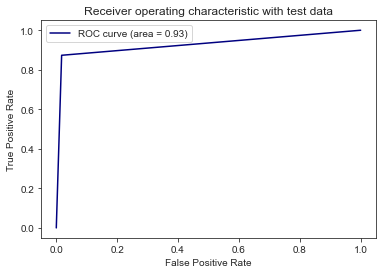

In [131]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

- And it helps us visual the rank of the most important features that the model has used for learning to predict.

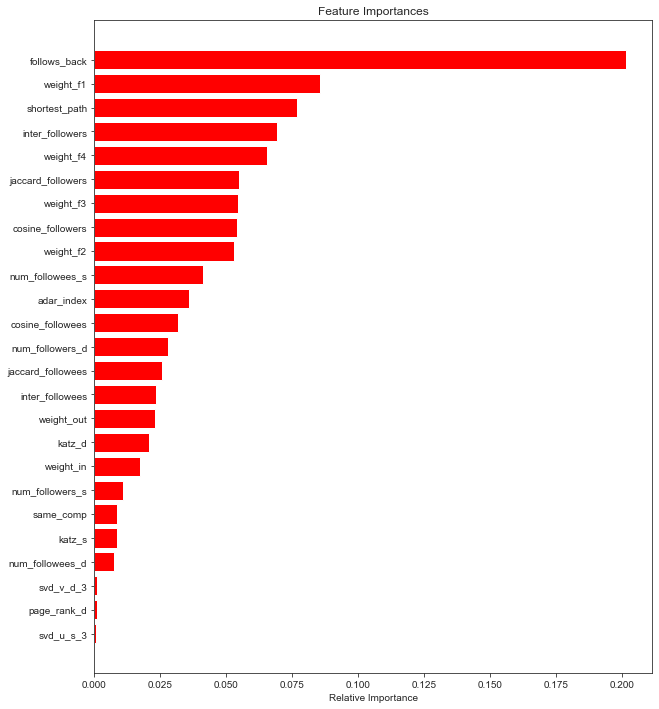

In [132]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [133]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0.000000,0.000000,0.000000,0.000000,11,6,15,8,0,0,...,1.983702e-06,-1.545086e-13,8.108423e-13,1.719689e-14,1.355367e-12,-4.675177e-13,1.128586e-06,-6.616670e-14,9.771075e-13,4.159920e-14
1,0.000000,0.000000,0.000000,0.000000,1,5,1,10,0,0,...,1.959853e-12,-3.889329e-11,2.213128e-11,2.654624e-12,5.330635e-11,-1.207402e-09,2.629760e-10,-2.980901e-09,1.613374e-09,2.517265e-10
2,0.111111,0.272727,0.111111,0.433013,1,9,6,8,1,3,...,1.730812e-15,-2.881453e-17,1.716375e-14,8.069822e-19,1.064725e-12,-5.365461e-14,2.621208e-12,-7.550340e-14,2.482020e-13,1.564263e-14
3,0.000000,0.028571,0.000000,0.056344,11,17,21,15,0,1,...,1.046352e-08,-2.905361e-12,7.677579e-13,1.414565e-14,1.036105e-11,-5.086069e-11,9.462067e-09,-3.614844e-11,2.828125e-11,2.081892e-13
4,0.260870,0.291667,0.121268,0.497468,17,12,22,9,6,7,...,3.377700e-12,-1.175204e-14,3.826162e-13,3.093846e-16,1.672444e-12,-3.368243e-12,1.723874e-10,-2.394136e-13,1.242026e-12,9.206375e-14


In [134]:
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0.052632,0.0,0.029161,0.0,6,14,6,9,1,0,...,5.904813e-11,-2.701538e-12,4.341608e-13,5.535513e-14,9.994075e-10,-5.791908e-10,3.512355e-07,-2.486660e-09,2.771146e-09,1.727696e-12
1,0.000000,0.0,0.000000,0.0,7,13,9,12,0,0,...,5.804518e-12,-1.283237e-13,2.121570e-11,4.199913e-14,1.890825e-13,-2.311700e-10,9.483126e-12,-1.516667e-13,3.739905e-13,2.758228e-15
2,0.000000,0.0,0.000000,0.0,6,33,18,39,0,0,...,2.319119e-06,-5.203585e-13,7.163143e-12,2.274392e-13,7.837825e-11,-2.654786e-11,7.570651e-05,-3.646986e-11,8.483907e-11,3.461282e-12
3,0.000000,0.0,0.000000,0.0,1,47,3,4,0,0,...,1.562417e-09,-4.329053e-14,5.734860e-12,4.854200e-14,2.627095e-09,-1.877209e-09,3.429059e-07,-4.210417e-11,6.200170e-10,4.939431e-13
4,0.066667,0.0,0.044412,0.0,3,13,3,1,1,0,...,2.549261e-12,-6.144189e-14,1.904112e-14,1.314836e-17,3.146438e-13,-5.433112e-12,4.977704e-11,-8.560570e-15,3.101546e-13,3.234878e-16


- It can read file that is in the edgelist format. The train_pos_after_eda.csv and test_pos_after_eda.csv files are files that contain the positive edges in the social network dataset.

In [135]:
train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
test_graph=nx.read_edgelist('data/after_eda/test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

- This function compute_features_stage1 can show us:
    + The number of followers of the source node
    + The number of followees of the source node
    + The number of followers of the destination node
    + The number of followees of the destination node
    + The intersection of the followers of the source and destination nodes
    + The intersection of the followees of the source and destination nodes
    
- For each row, the function tries to get the set of predecessors and successors of the source node and destination node from the graph graph. If the node does not exist in the graph, the function sets the set to an empty set. The function then appends the following values to the six lists:

    + The length of the set of predecessors of the source node
    + The length of the set of successors of the source node
    + The length of the set of predecessors of the destination node
    + The length of the set of successors of the destination node
    + The length of the intersection of the set of predecessors of the source and destination nodes
    + The length of the intersection of the set of successors of the source and destination nodes    

In [136]:
from tqdm import tqdm
def compute_features_stage1(df,graph):
  num_followers_s =[]
  num_followees_s =[]
  num_followers_d =[]
  num_followees_d = []
  inter_followers= []
  inter_followees =[]
  for i,row in tqdm(df.iterrows()):
    try:
      s1 = set(graph.predecessors(row['source_node']))
      s2 = set(graph.successors(row['source_node']))
    except:
      s1 = set()
      s2 = set()
    try: 
      d1 = set(graph.predecessors(row["destination_node"]))
      d2 = set(graph.successors(row['destination_node']))
    except:
      d1 = set()
      d2 = set()
    num_followers_s.append(len(s1))
    num_followees_s.append(len(s2))
    num_followers_d.append(len(d1))
    num_followees_d.append(len(d2))

    inter_followees.append(len(s1.intersection(d1)))
    inter_followers.append(len(s2.intersection(d2)))

  return num_followers_d,num_followees_d,num_followers_s,num_followees_s,inter_followers,inter_followees     

In [137]:
train_num_followers_d,train_num_followees_d,train_num_followers_s,train_num_followees_s,train_inter_followers,train_inter_followees = compute_features_stage1(df_final_train,train_graph)
test_num_followers_d,test_num_followees_d,test_num_followers_s,test_num_followees_s,test_inter_followers,test_inter_followees = compute_features_stage1(df_final_test,test_graph)

100002it [00:04, 20222.31it/s]
50002it [00:02, 19151.19it/s]


In [138]:
len(train_num_followers_d)

100002

In [139]:
len(test_num_followers_d)

50002

In [140]:
df_final_train["num_followers_d"] = train_num_followers_d
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0.000000,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,1.983702e-06,-1.545086e-13,8.108423e-13,1.719689e-14,1.355367e-12,-4.675177e-13,1.128586e-06,-6.616670e-14,9.771075e-13,4.159920e-14
1,0.000000,0.000000,0.000000,0.000000,1,0,1,10,0,0,...,1.959853e-12,-3.889329e-11,2.213128e-11,2.654624e-12,5.330635e-11,-1.207402e-09,2.629760e-10,-2.980901e-09,1.613374e-09,2.517265e-10
2,0.111111,0.272727,0.111111,0.433013,1,0,6,8,1,3,...,1.730812e-15,-2.881453e-17,1.716375e-14,8.069822e-19,1.064725e-12,-5.365461e-14,2.621208e-12,-7.550340e-14,2.482020e-13,1.564263e-14
3,0.000000,0.028571,0.000000,0.056344,11,0,21,15,0,1,...,1.046352e-08,-2.905361e-12,7.677579e-13,1.414565e-14,1.036105e-11,-5.086069e-11,9.462067e-09,-3.614844e-11,2.828125e-11,2.081892e-13
4,0.260870,0.291667,0.121268,0.497468,17,0,22,9,6,7,...,3.377700e-12,-1.175204e-14,3.826162e-13,3.093846e-16,1.672444e-12,-3.368243e-12,1.723874e-10,-2.394136e-13,1.242026e-12,9.206375e-14


In [141]:
df_final_test['num_followers_d'] = test_num_followees_d
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0.052632,0.0,0.029161,0.0,6,0,6,9,1,0,...,5.904813e-11,-2.701538e-12,4.341608e-13,5.535513e-14,9.994075e-10,-5.791908e-10,3.512355e-07,-2.486660e-09,2.771146e-09,1.727696e-12
1,0.000000,0.0,0.000000,0.0,7,0,9,12,0,0,...,5.804518e-12,-1.283237e-13,2.121570e-11,4.199913e-14,1.890825e-13,-2.311700e-10,9.483126e-12,-1.516667e-13,3.739905e-13,2.758228e-15
2,0.000000,0.0,0.000000,0.0,6,0,18,39,0,0,...,2.319119e-06,-5.203585e-13,7.163143e-12,2.274392e-13,7.837825e-11,-2.654786e-11,7.570651e-05,-3.646986e-11,8.483907e-11,3.461282e-12
3,0.000000,0.0,0.000000,0.0,1,0,3,4,0,0,...,1.562417e-09,-4.329053e-14,5.734860e-12,4.854200e-14,2.627095e-09,-1.877209e-09,3.429059e-07,-4.210417e-11,6.200170e-10,4.939431e-13
4,0.066667,0.0,0.044412,0.0,3,0,3,1,1,0,...,2.549261e-12,-6.144189e-14,1.904112e-14,1.314836e-17,3.146438e-13,-5.433112e-12,4.977704e-11,-8.560570e-15,3.101546e-13,3.234878e-16


- The df_final_train and df_final_test dataframes each have four additional feature columns that were introduced by the author. The two new columns are followers_preferential_attch, which is the sum of the numbers of followers on each node (source and destination), and followers_preferential_attach, which is the sum of the numbers of followers on each node (source and destination).

In [142]:
source = np.array(df_final_train["num_followers_s"])
destination = np.array(df_final_train["num_followers_d"])
followers_preferential = []
for i in range(len(source)):
  followers_preferential.append(source[i]*destination[i])
df_final_train["followers_preferential_attach"]  = followers_preferential 
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach
0,0.000000,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,-1.545086e-13,8.108423e-13,1.719689e-14,1.355367e-12,-4.675177e-13,1.128586e-06,-6.616670e-14,9.771075e-13,4.159920e-14,0
1,0.000000,0.000000,0.000000,0.000000,1,0,1,10,0,0,...,-3.889329e-11,2.213128e-11,2.654624e-12,5.330635e-11,-1.207402e-09,2.629760e-10,-2.980901e-09,1.613374e-09,2.517265e-10,0
2,0.111111,0.272727,0.111111,0.433013,1,0,6,8,1,3,...,-2.881453e-17,1.716375e-14,8.069822e-19,1.064725e-12,-5.365461e-14,2.621208e-12,-7.550340e-14,2.482020e-13,1.564263e-14,0
3,0.000000,0.028571,0.000000,0.056344,11,0,21,15,0,1,...,-2.905361e-12,7.677579e-13,1.414565e-14,1.036105e-11,-5.086069e-11,9.462067e-09,-3.614844e-11,2.828125e-11,2.081892e-13,0
4,0.260870,0.291667,0.121268,0.497468,17,0,22,9,6,7,...,-1.175204e-14,3.826162e-13,3.093846e-16,1.672444e-12,-3.368243e-12,1.723874e-10,-2.394136e-13,1.242026e-12,9.206375e-14,0


In [143]:
source = np.array(df_final_train["num_followees_s"])
destination = np.array(df_final_train["num_followees_s"])
followees_preferential = []
for i in range(len(source)):
  followees_preferential.append(source[i]*destination[i])
df_final_train["followees_preferential_attach"]  = followees_preferential 
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach
0,0.000000,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,8.108423e-13,1.719689e-14,1.355367e-12,-4.675177e-13,1.128586e-06,-6.616670e-14,9.771075e-13,4.159920e-14,0,225
1,0.000000,0.000000,0.000000,0.000000,1,0,1,10,0,0,...,2.213128e-11,2.654624e-12,5.330635e-11,-1.207402e-09,2.629760e-10,-2.980901e-09,1.613374e-09,2.517265e-10,0,1
2,0.111111,0.272727,0.111111,0.433013,1,0,6,8,1,3,...,1.716375e-14,8.069822e-19,1.064725e-12,-5.365461e-14,2.621208e-12,-7.550340e-14,2.482020e-13,1.564263e-14,0,36
3,0.000000,0.028571,0.000000,0.056344,11,0,21,15,0,1,...,7.677579e-13,1.414565e-14,1.036105e-11,-5.086069e-11,9.462067e-09,-3.614844e-11,2.828125e-11,2.081892e-13,0,441
4,0.260870,0.291667,0.121268,0.497468,17,0,22,9,6,7,...,3.826162e-13,3.093846e-16,1.672444e-12,-3.368243e-12,1.723874e-10,-2.394136e-13,1.242026e-12,9.206375e-14,0,484


In [144]:
source = np.array(df_final_test["num_followers_s"])
destination = np.array(df_final_test["num_followers_d"])
followers_preferential = []
for i in range(len(source)):
  followers_preferential.append(source[i]*destination[i])
df_final_test["followers_preferential_attach"]  = followers_preferential 
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach
0,0.052632,0.0,0.029161,0.0,6,0,6,9,1,0,...,-2.701538e-12,4.341608e-13,5.535513e-14,9.994075e-10,-5.791908e-10,3.512355e-07,-2.486660e-09,2.771146e-09,1.727696e-12,0
1,0.000000,0.0,0.000000,0.0,7,0,9,12,0,0,...,-1.283237e-13,2.121570e-11,4.199913e-14,1.890825e-13,-2.311700e-10,9.483126e-12,-1.516667e-13,3.739905e-13,2.758228e-15,0
2,0.000000,0.0,0.000000,0.0,6,0,18,39,0,0,...,-5.203585e-13,7.163143e-12,2.274392e-13,7.837825e-11,-2.654786e-11,7.570651e-05,-3.646986e-11,8.483907e-11,3.461282e-12,0
3,0.000000,0.0,0.000000,0.0,1,0,3,4,0,0,...,-4.329053e-14,5.734860e-12,4.854200e-14,2.627095e-09,-1.877209e-09,3.429059e-07,-4.210417e-11,6.200170e-10,4.939431e-13,0
4,0.066667,0.0,0.044412,0.0,3,0,3,1,1,0,...,-6.144189e-14,1.904112e-14,1.314836e-17,3.146438e-13,-5.433112e-12,4.977704e-11,-8.560570e-15,3.101546e-13,3.234878e-16,0


In [145]:
source = np.array(df_final_test["num_followees_s"])
destination = np.array(df_final_test["num_followees_s"])
followees_preferential = []
for i in range(len(source)):
  followees_preferential.append(source[i]*destination[i])
df_final_test["followees_preferential_attach"]  = followees_preferential 
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach
0,0.052632,0.0,0.029161,0.0,6,0,6,9,1,0,...,4.341608e-13,5.535513e-14,9.994075e-10,-5.791908e-10,3.512355e-07,-2.486660e-09,2.771146e-09,1.727696e-12,0,36
1,0.000000,0.0,0.000000,0.0,7,0,9,12,0,0,...,2.121570e-11,4.199913e-14,1.890825e-13,-2.311700e-10,9.483126e-12,-1.516667e-13,3.739905e-13,2.758228e-15,0,81
2,0.000000,0.0,0.000000,0.0,6,0,18,39,0,0,...,7.163143e-12,2.274392e-13,7.837825e-11,-2.654786e-11,7.570651e-05,-3.646986e-11,8.483907e-11,3.461282e-12,0,324
3,0.000000,0.0,0.000000,0.0,1,0,3,4,0,0,...,5.734860e-12,4.854200e-14,2.627095e-09,-1.877209e-09,3.429059e-07,-4.210417e-11,6.200170e-10,4.939431e-13,0,9
4,0.066667,0.0,0.044412,0.0,3,0,3,1,1,0,...,1.904112e-14,1.314836e-17,3.146438e-13,-5.433112e-12,4.977704e-11,-8.560570e-15,3.101546e-13,3.234878e-16,0,9


In [146]:
sorted(df_final_train.columns)

['adar_index',
 'authorities_d',
 'authorities_s',
 'cosine_followees',
 'cosine_followers',
 'followees_preferential_attach',
 'followers_preferential_attach',
 'follows_back',
 'hubs_d',
 'hubs_s',
 'inter_followees',
 'inter_followers',
 'jaccard_followees',
 'jaccard_followers',
 'katz_d',
 'katz_s',
 'num_followees_d',
 'num_followees_s',
 'num_followers_d',
 'num_followers_s',
 'page_rank_d',
 'page_rank_s',
 'same_comp',
 'shortest_path',
 'svd_u_d_1',
 'svd_u_d_2',
 'svd_u_d_3',
 'svd_u_d_4',
 'svd_u_d_5',
 'svd_u_d_6',
 'svd_u_s_1',
 'svd_u_s_2',
 'svd_u_s_3',
 'svd_u_s_4',
 'svd_u_s_5',
 'svd_u_s_6',
 'svd_v_d_1',
 'svd_v_d_2',
 'svd_v_d_3',
 'svd_v_d_4',
 'svd_v_d_5',
 'svd_v_d_6',
 'svd_v_s_1',
 'svd_v_s_2',
 'svd_v_s_3',
 'svd_v_s_4',
 'svd_v_s_5',
 'svd_v_s_6',
 'weight_f1',
 'weight_f2',
 'weight_f3',
 'weight_f4',
 'weight_in',
 'weight_out']

- This code is for both the df_final_train and df_final_test dataframes, the author applied a variety of novel SVD features. These characteristics include the singular value matrix's dot product with the right singular vectors in row form v between the source and destination nodes and the singular value matrix's dot product with the left singular vectors in column form u.

In [147]:
svd_dot_U =[]
range_value = len(np.array(df_final_train["svd_u_d_1"]))
for i in range(range_value):
  u_s = []
  u_d = []
  u_s.append(np.array(df_final_train["svd_u_s_1"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_2"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_3"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_4"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_5"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_6"][i]))

  u_d.append(np.array(df_final_train["svd_u_d_1"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_2"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_3"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_4"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_5"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_6"][i]))

  svd_dot_U.append(np.dot(u_s,u_d))

In [148]:
df_final_train["svd_dot_U"] = svd_dot_U
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U
0,0.000000,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,1.719689e-14,1.355367e-12,-4.675177e-13,1.128586e-06,-6.616670e-14,9.771075e-13,4.159920e-14,0,225,1.114948e-11
1,0.000000,0.000000,0.000000,0.000000,1,0,1,10,0,0,...,2.654624e-12,5.330635e-11,-1.207402e-09,2.629760e-10,-2.980901e-09,1.613374e-09,2.517265e-10,0,1,-4.613342e-28
2,0.111111,0.272727,0.111111,0.433013,1,0,6,8,1,3,...,8.069822e-19,1.064725e-12,-5.365461e-14,2.621208e-12,-7.550340e-14,2.482020e-13,1.564263e-14,0,36,5.452490e-25
3,0.000000,0.028571,0.000000,0.056344,11,0,21,15,0,1,...,1.414565e-14,1.036105e-11,-5.086069e-11,9.462067e-09,-3.614844e-11,2.828125e-11,2.081892e-13,0,441,2.420813e-15
4,0.260870,0.291667,0.121268,0.497468,17,0,22,9,6,7,...,3.093846e-16,1.672444e-12,-3.368243e-12,1.723874e-10,-2.394136e-13,1.242026e-12,9.206375e-14,0,484,1.056417e-22


In [149]:
svd_dot_V = []
range_value = len(np.array(df_final_train["svd_v_d_1"]))
for i in range(range_value):
  v_s = []
  v_d = []
  v_s.append(np.array(df_final_train["svd_v_s_1"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_2"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_3"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_4"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_5"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_6"][i]))

  v_d.append(np.array(df_final_train["svd_v_d_1"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_2"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_3"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_4"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_5"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_6"][i]))

  svd_dot_V.append(np.dot(v_s,v_d))

In [150]:
df_final_train["svd_dot_V"] = svd_dot_V
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U,svd_dot_V
0,0.000000,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,1.355367e-12,-4.675177e-13,1.128586e-06,-6.616670e-14,9.771075e-13,4.159920e-14,0,225,1.114948e-11,2.238779e-12
1,0.000000,0.000000,0.000000,0.000000,1,0,1,10,0,0,...,5.330635e-11,-1.207402e-09,2.629760e-10,-2.980901e-09,1.613374e-09,2.517265e-10,0,1,-4.613342e-28,1.703408e-19
2,0.111111,0.272727,0.111111,0.433013,1,0,6,8,1,3,...,1.064725e-12,-5.365461e-14,2.621208e-12,-7.550340e-14,2.482020e-13,1.564263e-14,0,36,5.452490e-25,3.848470e-25
3,0.000000,0.028571,0.000000,0.056344,11,0,21,15,0,1,...,1.036105e-11,-5.086069e-11,9.462067e-09,-3.614844e-11,2.828125e-11,2.081892e-13,0,441,2.420813e-15,9.900691e-17
4,0.260870,0.291667,0.121268,0.497468,17,0,22,9,6,7,...,1.672444e-12,-3.368243e-12,1.723874e-10,-2.394136e-13,1.242026e-12,9.206375e-14,0,484,1.056417e-22,5.865222e-22


In [151]:
svd_dot_U =[]
range_value = len(np.array(df_final_test["svd_u_d_1"]))
for i in range(range_value):
  u_s = []
  u_d = []
  u_s.append(np.array(df_final_test["svd_u_s_1"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_2"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_3"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_4"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_5"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_6"][i]))

  u_d.append(np.array(df_final_test["svd_u_d_1"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_2"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_3"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_4"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_5"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_6"][i]))

  svd_dot_U.append(np.dot(u_s,u_d))

In [152]:
df_final_test["svd_dot_U"] = svd_dot_U
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U
0,0.052632,0.0,0.029161,0.0,6,0,6,9,1,0,...,5.535513e-14,9.994075e-10,-5.791908e-10,3.512355e-07,-2.486660e-09,2.771146e-09,1.727696e-12,0,36,8.424800e-20
1,0.000000,0.0,0.000000,0.0,7,0,9,12,0,0,...,4.199913e-14,1.890825e-13,-2.311700e-10,9.483126e-12,-1.516667e-13,3.739905e-13,2.758228e-15,0,81,5.144614e-19
2,0.000000,0.0,0.000000,0.0,6,0,18,39,0,0,...,2.274392e-13,7.837825e-11,-2.654786e-11,7.570651e-05,-3.646986e-11,8.483907e-11,3.461282e-12,0,324,1.496525e-10
3,0.000000,0.0,0.000000,0.0,1,0,3,4,0,0,...,4.854200e-14,2.627095e-09,-1.877209e-09,3.429059e-07,-4.210417e-11,6.200170e-10,4.939431e-13,0,9,1.236029e-17
4,0.066667,0.0,0.044412,0.0,3,0,3,1,1,0,...,1.314836e-17,3.146438e-13,-5.433112e-12,4.977704e-11,-8.560570e-15,3.101546e-13,3.234878e-16,0,9,1.947609e-23


In [153]:
svd_dot_V = []
range_value = len(np.array(df_final_test["svd_v_d_1"]))
for i in range(range_value):
  v_s = []
  v_d = []
  v_s.append(np.array(df_final_test["svd_v_s_1"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_2"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_3"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_4"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_5"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_6"][i]))

  v_d.append(np.array(df_final_test["svd_v_d_1"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_2"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_3"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_4"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_5"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_6"][i]))

  svd_dot_V.append(np.dot(v_s,v_d))

In [154]:
df_final_test["svd_dot_V"] = svd_dot_V
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U,svd_dot_V
0,0.052632,0.0,0.029161,0.0,6,0,6,9,1,0,...,9.994075e-10,-5.791908e-10,3.512355e-07,-2.486660e-09,2.771146e-09,1.727696e-12,0,36,8.424800e-20,2.074804e-17
1,0.000000,0.0,0.000000,0.0,7,0,9,12,0,0,...,1.890825e-13,-2.311700e-10,9.483126e-12,-1.516667e-13,3.739905e-13,2.758228e-15,0,81,5.144614e-19,4.371654e-22
2,0.000000,0.0,0.000000,0.0,6,0,18,39,0,0,...,7.837825e-11,-2.654786e-11,7.570651e-05,-3.646986e-11,8.483907e-11,3.461282e-12,0,324,1.496525e-10,1.755724e-10
3,0.000000,0.0,0.000000,0.0,1,0,3,4,0,0,...,2.627095e-09,-1.877209e-09,3.429059e-07,-4.210417e-11,6.200170e-10,4.939431e-13,0,9,1.236029e-17,5.380495e-16
4,0.066667,0.0,0.044412,0.0,3,0,3,1,1,0,...,3.146438e-13,-5.433112e-12,4.977704e-11,-8.560570e-15,3.101546e-13,3.234878e-16,0,9,1.947609e-23,1.277394e-22


In [155]:
x_train  =  df_final_train
x_test = df_final_test

In [156]:
x_train.shape

(100002, 56)

In [157]:
y_train.shape

(100002,)

In [158]:
x_test.shape

(50002, 56)

In [159]:
y_test.shape

(50002,)

In [160]:
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV

In [161]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [0,1]
    cmap=sns.light_palette("green")
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))

    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

- This cell the author want to use the XGBoost model with the RandomizedSearchCV() function to find the best hyperparameters.

In [162]:
params = {
        'min_child_weight': [1, 5, 10],
        'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' :[100,200,500,1000,2000],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
          }
xgboost = XGBClassifier()          
random_cfl1=RandomizedSearchCV(xgboost,param_distributions = params,verbose=10,n_jobs=-1)
random_cfl1.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=10)

In [163]:
print(random_cfl1.best_params_)

{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.5, 'colsample_bytree': 1.0}


- Use the best hyperparameters of the author that he found.

In [164]:
from sklearn.calibration import CalibratedClassifierCV
best_xgb = XGBClassifier(sub_sample=0.8,learning_rate = 0.2,colsample_bytree=0.6,max_depth=5,n_estimators=1000,min_child_weight=5,gamma=5)
best_xgb.fit(x_train,y_train)
clf = CalibratedClassifierCV(best_xgb,method="sigmoid")
clf.fit(x_train,y_train)

[00:05:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[00:07:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[00:09:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[00:11:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[00:13:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.



CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=None,
                                                    booster=None,
                                                    callbacks=None,
                                                    colsample_bylevel=None,
                                                    colsample_bynode=None,
                                                    colsample_bytree=0.6,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None,
                                                    feature_types=None, gamma=5,
                                                    gpu_id=None,
                                                    grow_policy=None,
                                                    importance_type=None,
                                                    interaction_constraints=None,
                                                    learning_rate=0.2,
                                                    max_bin=None,
                                                    max_cat_threshold=None,
                                                    max_cat_to_onehot=None,
                                                    max_delta_step=None,
                                                    max_depth=5,
                                                    max_leaves=None,
                                                    min_child_weight=5,
                                                    missing=nan,
                                                    monotone_constraints=None,
                                                    n_estimators=1000,
                                                    n_jobs=None,
                                                    num_parallel_tree=None,
                                                    predictor=None,
                                                    random_state=None, ...))

- The author still display confusion metrics, ROC-AUC and feature importance in order to compare the 2 ways and knowing which is better.

- The result of bellowing confusion matrix shows that misclassified points of the model is 8.799648014079436

the train log loss is 0.024061811302940314
the test log loss is 0.35284465512537017
Number of misclassified points  8.799648014079436
-------------------------------------------------- Confusion matrix --------------------------------------------------


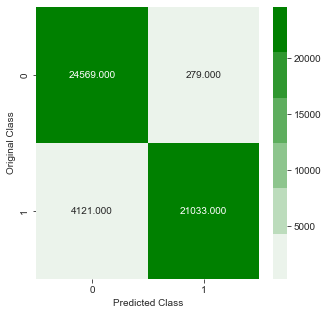

-------------------------------------------------- Precision matrix --------------------------------------------------


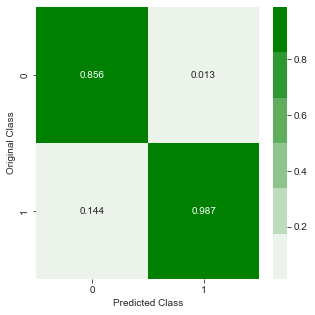

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


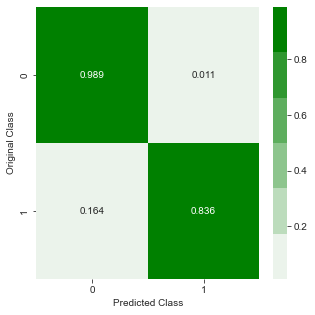

Sum of rows in precision matrix [1. 1.]


In [165]:
from sklearn.metrics import log_loss
predict_y = clf.predict_proba(x_train)
print("the train log loss is",log_loss(y_train,predict_y,labels=best_xgb.classes_))
predict_y = clf.predict_proba(x_test)
print("the test log loss is",log_loss(y_test,predict_y,labels = best_xgb.classes_))
plot_confusion_matrix(y_test,clf.predict(x_test))

- The result of bellowing code can confirm that compared to the prior Random Forest model, the model performs better on the training set in terms of F-score, but performs worse on the test set.

In [166]:
from sklearn.metrics import f1_score
print("f1 score for train data",f1_score(y_train,clf.predict(x_train)))
print("f1 score for test data",f1_score(y_test,clf.predict(x_test)))

f1 score for train data 0.9922934094675264
f1 score for test data 0.905307106271252


- About the AUC-ROC it is worse than Random Forest (0.91 < 0.93) as the result bellow.

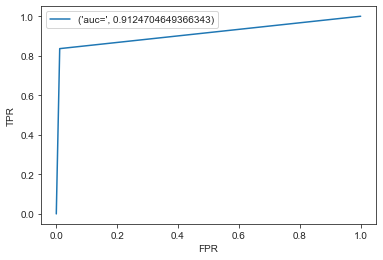

In [167]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,clf.predict(x_test))
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr,label = ('auc=',auc_sc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

- This can show us the rank of important features which are added.

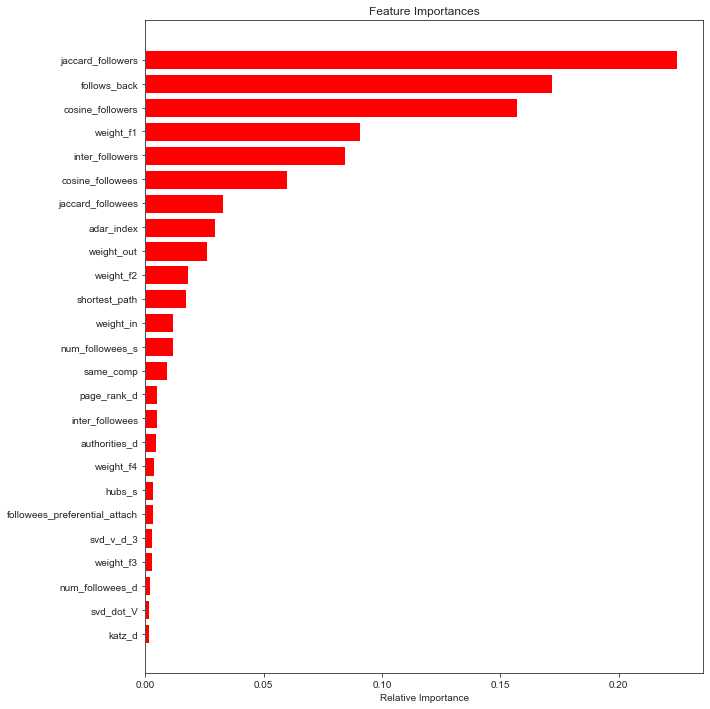

In [168]:
features = df_final_train.columns
importances = best_xgb.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Finally, this code can show us the F1-score in training set and test set with XGBoost.

In [171]:
from prettytable import PrettyTable
t = PrettyTable()
t.field_names=["model","train_f1_Score","test_f1_score"]
t.add_row(["XGBoost","0.9920553921274338","0.9124241511382708"])
print(t)

+---------+--------------------+--------------------+
|  model  |   train_f1_Score   |   test_f1_score    |
+---------+--------------------+--------------------+
| XGBoost | 0.9920553921274338 | 0.9124241511382708 |
+---------+--------------------+--------------------+


- About the train set: XGBoost is better than the original Random Forest model (0.9920553921274338 > 0.9655634109973931)
- About the test set: XGBoost is worse than the original Random Forest model (0.9124241511382708 < 0.9238629912319435)
- To sum up, the results on the test set are worse than when using the original Random Forest model, in contrast with the train set. But in general, both of the methods are good to use.

---

## <font size="6"><font color="blue">III. References</font>

<font color="red">
    
- This final part contains all of the materials that I used to sovled the Lab 03 problems.   
    
</font>

---

- [1]:      [Jaccard Index / Similarity Coefficient](https://www.statisticshowto.com/jaccard-index/)
- [2]:      [PageRank Algorithm - Example](https://www.youtube.com/watch?v=P8Kt6Abq_rM)
- [3]:      [Jaccard Index / Similarity Coefficient](https://www.statisticshowto.com/jaccard-index/)
- [4]:      [Cosine Similarity](https://www.geeksforgeeks.org/cosine-similarity/)
- [5]:      [Wikipedia with Otsuka–Ochiai coefficient](https://en.wikipedia.org/wiki/Cosine_similarity)
- [6]:      [Katz centrality](https://en.wikipedia.org/wiki/Katz_centrality)
- [7]:      [PageRank](https://en.wikipedia.org/wiki/PageRank)
- [8]:      [HITS algorithm](https://en.wikipedia.org/wiki/HITS_algorithm)
- [9]:      [Katz Centrality (Centrality Measure)](https://www.geeksforgeeks.org/katz-centrality-centrality-measure/)
- [10]:      [NetworkX pagerank](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html)
- [11]:      [PageRank Algorithm - Example](https://www.youtube.com/watch?v=P8Kt6Abq_rM)
- [12]:      [Social network Graph Link Prediction](https://www.kaggle.com/code/genialgokul1099/social-network-graph-link-prediction/notebook#1.-Reading-Data)
- [13]:      [Link Prediction Algorithms](http://be.amazd.com/link-prediction/)
- [14]:      [SVD_dot](https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf)
- [15]:      [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
- [16]:      [Phân loại: Đường cong ROC và AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=vi)
- [17]:      [Adamic–Adar index](https://en.wikipedia.org/wiki/Adamic%E2%80%93Adar_index)

---

<div align="center">
    
# <font color="blue">THANK YOU TEACHERS FOR READING AND GRADING MY REPORT.</font>
    
</div>


<div align="center">

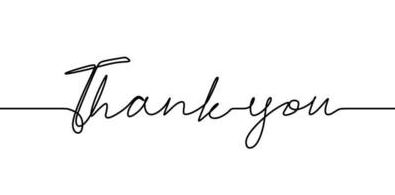    

</div>

---

---